In [154]:
import igraph as ig
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14) 

# Motifs 3 

In [184]:
name_list = ['human_neuron','rat_neuron',
            'monkey_neuron','zebrafish_neuron',
    'vascular_2','vascular_3','vascular_1','mitochondrial','root_1','root_2','anthill','fruit_fly_2','fruit_fly_3','fruit_fly_1','fruit_fly_4']
motif_number = 3
motif_counts_dict = {}
motif_counts_original_dict = {}
n_trials = 20
count = 1
for name in name_list:
    #print('******',name)
    path_source = '../1. data/3. final_data/'
    link_paths = pd.read_csv(path_source +name + '.paths.csv',index_col=[0])
    path_bodyid_list = link_paths[['path_id','bodyId_pre','bodyId_post']].drop_duplicates().values.tolist()
    path_bodyid_dict = {}  
    bodyid_path_dict = {}
    for path_bodyid in path_bodyid_list:
        path_bodyid_dict[path_bodyid[0]] =  (path_bodyid[1],path_bodyid[2])
        bodyid_path_dict[(path_bodyid[1],path_bodyid[2])] = path_bodyid[0]
        bodyid_path_dict[(path_bodyid[2],path_bodyid[1])] = path_bodyid[0] 
    edge_list = []
    for path_id,bodyid_edge in path_bodyid_dict.items():
        edge_list.append([bodyid_edge[0],bodyid_edge[1]])
    print(len(edge_list))
    df = pd.DataFrame(edge_list)
    G = nx.from_edgelist(edge_list)
    print(nx.is_connected(G))
    degrees = dict(G.degree)
    degree_sequence = degrees.values()
    g = ig.Graph(n=len(df), edges=[(v,w) for v,w in df.values] )
    motif_counts_original =g.motifs_randesu(motif_number)
    motif_counts_original_dict[name]=motif_counts_original
    motif_counts_dict[name] = {}
    for trial in range(0,n_trials):
        print('name',name,'trial',trial,n_trials)
        count += 1
        G_conf = nx.configuration_model(degree_sequence,seed = trial*count)
        print(nx.is_connected(G_conf))
        df = pd.DataFrame(G_conf.edges())
        g = ig.Graph(n=len(df), edges=[(v,w) for v,w in df.values] )
        motif_counts=g.motifs_randesu(motif_number)
        motif_counts_dict[name][trial] = motif_counts

631
True
name human_neuron trial 0 20
False
name human_neuron trial 1 20
False
name human_neuron trial 2 20
False
name human_neuron trial 3 20
False
name human_neuron trial 4 20
False
name human_neuron trial 5 20
False
name human_neuron trial 6 20
False
name human_neuron trial 7 20
False
name human_neuron trial 8 20
False
name human_neuron trial 9 20
False
name human_neuron trial 10 20
False
name human_neuron trial 11 20
False
name human_neuron trial 12 20
False
name human_neuron trial 13 20
False
name human_neuron trial 14 20
False
name human_neuron trial 15 20
False
name human_neuron trial 16 20
False
name human_neuron trial 17 20
False
name human_neuron trial 18 20
False
name human_neuron trial 19 20
False
185
True
name rat_neuron trial 0 20
False
name rat_neuron trial 1 20
False
name rat_neuron trial 2 20
False
name rat_neuron trial 3 20
False
name rat_neuron trial 4 20
False
name rat_neuron trial 5 20
False
name rat_neuron trial 6 20
False
name rat_neuron trial 7 20
False
name rat

In [185]:
z_scores_dict = {}
for name in name_list:
    z_scores_dict[name] = {}
    for motif_index in range(0,len(motif_counts_original_dict[name])):
        motif_value_list = []
        for trial in range(0,n_trials):
            motif_value_list.append(motif_counts_dict[name][trial][motif_index])
        z_score = (motif_counts_original_dict[name][motif_index] - np.mean(motif_value_list))/np.std(motif_value_list)
        z_scores_dict[name][motif_index] = z_score

Text(0.5, 1.0, 'Motif 3 counts')

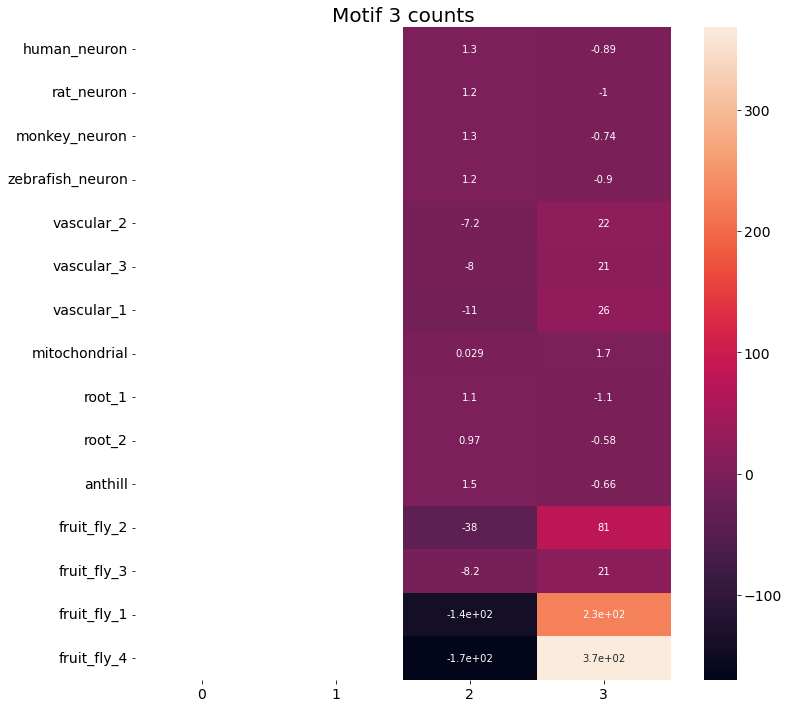

In [187]:
all_motifs = pd.DataFrame(z_scores_dict).transpose()
plt.figure(figsize=(12,12))
sns.heatmap(all_motifs,annot=True);
plt.title('Motif 3 counts')

igraph needs consecutive node ids starting from 0 

Draw the motifs

0
1
2
3


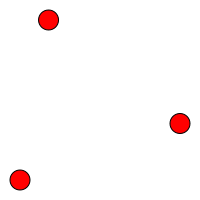

In [138]:
#for i,c in enumerate(motif_counts):
for i in range(len(motif_counts)):
    print(i)
i = 0
ig.plot(ig.Graph.Isoclass(3, i),bbox=(200,200))

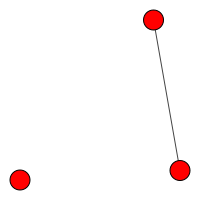

In [139]:
i = 1
ig.plot(ig.Graph.Isoclass(3, i),bbox=(200,200))

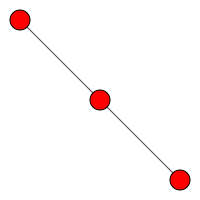

In [140]:
i = 2
ig.plot(ig.Graph.Isoclass(3, i),bbox=(200,200))

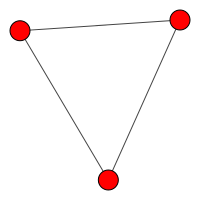

In [141]:
i = 3
ig.plot(ig.Graph.Isoclass(3, i),bbox=(200,200))

In [188]:
name_list = ['human_neuron','rat_neuron',
            'monkey_neuron','zebrafish_neuron',
    'vascular_2','vascular_3','vascular_1','mitochondrial','root_1','root_2','anthill','fruit_fly_2','fruit_fly_3','fruit_fly_1','fruit_fly_4']
motif_number = 4
motif_counts_dict = {}
motif_counts_original_dict = {}
n_trials = 20
count = 1
for name in name_list:
    #print('******',name)
    path_source = '../1. data/3. final_data/'
    link_paths = pd.read_csv(path_source +name + '.paths.csv',index_col=[0])
    path_bodyid_list = link_paths[['path_id','bodyId_pre','bodyId_post']].drop_duplicates().values.tolist()
    path_bodyid_dict = {}  
    bodyid_path_dict = {}
    for path_bodyid in path_bodyid_list:
        path_bodyid_dict[path_bodyid[0]] =  (path_bodyid[1],path_bodyid[2])
        bodyid_path_dict[(path_bodyid[1],path_bodyid[2])] = path_bodyid[0]
        bodyid_path_dict[(path_bodyid[2],path_bodyid[1])] = path_bodyid[0] 
    edge_list = []
    for path_id,bodyid_edge in path_bodyid_dict.items():
        edge_list.append([bodyid_edge[0],bodyid_edge[1]])
    print(len(edge_list))
    df = pd.DataFrame(edge_list)
    G = nx.from_edgelist(edge_list)
    print(nx.is_connected(G))
    degrees = dict(G.degree)
    degree_sequence = degrees.values()
    g = ig.Graph(n=len(df), edges=[(v,w) for v,w in df.values] )
    motif_counts_original =g.motifs_randesu(motif_number)
    motif_counts_original_dict[name]=motif_counts_original
    motif_counts_dict[name] = {}
    for trial in range(0,n_trials):
        print('name',name,'trial',trial,n_trials)
        count += 1
        G_conf = nx.configuration_model(degree_sequence,seed = trial*count)
        print(nx.is_connected(G_conf))
        df = pd.DataFrame(G_conf.edges())
        g = ig.Graph(n=len(df), edges=[(v,w) for v,w in df.values] )
        motif_counts=g.motifs_randesu(motif_number)
        motif_counts_dict[name][trial] = motif_counts

631
True
name human_neuron trial 0 20
False
name human_neuron trial 1 20
False
name human_neuron trial 2 20
False
name human_neuron trial 3 20
False
name human_neuron trial 4 20
False
name human_neuron trial 5 20
False
name human_neuron trial 6 20
False
name human_neuron trial 7 20
False
name human_neuron trial 8 20
False
name human_neuron trial 9 20
False
name human_neuron trial 10 20
False
name human_neuron trial 11 20
False
name human_neuron trial 12 20
False
name human_neuron trial 13 20
False
name human_neuron trial 14 20
False
name human_neuron trial 15 20
False
name human_neuron trial 16 20
False
name human_neuron trial 17 20
False
name human_neuron trial 18 20
False
name human_neuron trial 19 20
False
185
True
name rat_neuron trial 0 20
False
name rat_neuron trial 1 20
False
name rat_neuron trial 2 20
False
name rat_neuron trial 3 20
False
name rat_neuron trial 4 20
False
name rat_neuron trial 5 20
False
name rat_neuron trial 6 20
False
name rat_neuron trial 7 20
False
name rat

In [189]:
z_scores_dict = {}
for name in name_list:
    z_scores_dict[name] = {}
    for motif_index in range(0,len(motif_counts_original_dict[name])):
        motif_value_list = []
        for trial in range(0,n_trials):
            motif_value_list.append(motif_counts_dict[name][trial][motif_index])
        z_score = (motif_counts_original_dict[name][motif_index] - np.mean(motif_value_list))/np.std(motif_value_list)
        z_scores_dict[name][motif_index] = z_score

/tmp/ipykernel_40294/420544896.py:8: RuntimeWarning: invalid value encountered in double_scalars
  z_score = (motif_counts_original_dict[name][motif_index] - np.mean(motif_value_list))/np.std(motif_value_list)
/tmp/ipykernel_40294/420544896.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  z_score = (motif_counts_original_dict[name][motif_index] - np.mean(motif_value_list))/np.std(motif_value_list)


Text(0.5, 1.0, 'Motif 4 counts')

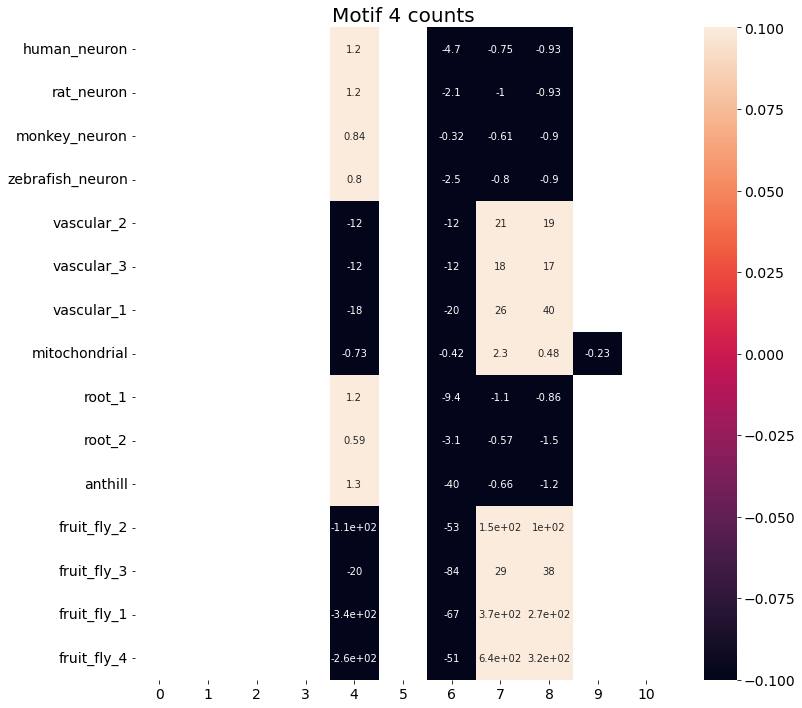

In [190]:
all_motifs = pd.DataFrame(z_scores_dict).transpose()
plt.figure(figsize=(12,12))
sns.heatmap(all_motifs,annot=True);
plt.title('Motif 4 counts')

100023


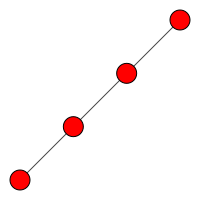

In [227]:
#for i,c in enumerate(motif_counts):
i=6
print(motif_counts[i])

ig.plot(ig.Graph.Isoclass(4, i),bbox=(200,200))


0


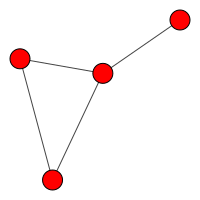

In [194]:
#for i,c in enumerate(motif_counts):
i=7
print(motif_counts[i])
#out = ig.plot(ig.Graph.Isoclass(6, i),bbox=(200,200))
#out.save('motif_4.png')
ig.plot(ig.Graph.Isoclass(4, i),bbox=(200,200))

0


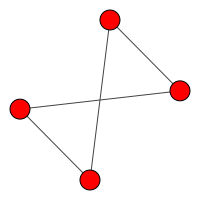

In [198]:
#for i,c in enumerate(motif_counts):
i=8
print(motif_counts[i])
#out = ig.plot(ig.Graph.Isoclass(6, i),bbox=(200,200))
#out.save('motif_4.png')
ig.plot(ig.Graph.Isoclass(4, i),bbox=(200,200))

In [ ]:
#for i,c in enumerate(motif_counts):
i=8
print(motif_counts[i])
out = ig.plot(ig.Graph.Isoclass(4, i),bbox=(200,200))
out.save('motif_8.png')

0


human_neuron
rat_neuron
monkey_neuron
zebrafish_neuron
vascular_2
vascular_3
vascular_1
mitochondrial
root_1
root_2
anthill
fruit_fly_2
fruit_fly_3
fruit_fly_1
fruit_fly_4
human_neuron
rat_neuron
monkey_neuron
zebrafish_neuron
vascular_2
vascular_3
vascular_1
mitochondrial
root_1
root_2
anthill
fruit_fly_2
fruit_fly_3
fruit_fly_1
fruit_fly_4


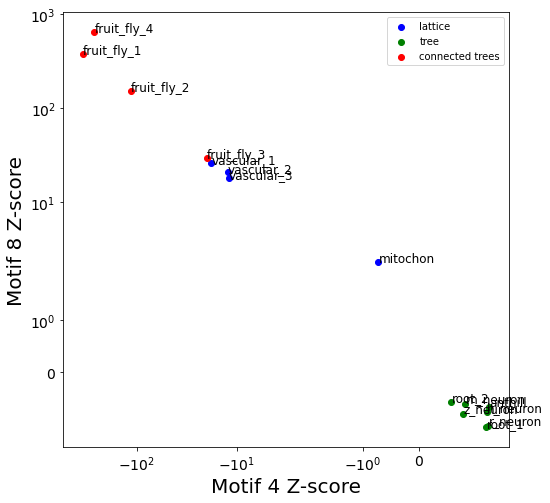

In [226]:
plt.figure(figsize=(8,8))
name_change_dict = {'zebrafish_neuron':'z_neuron','human_neuron':'h_neuron','monkey_neuron':'m_neuron','mitochondrial':'mitochon','rat_neuron':'r_neuron'}
index_1 = 4
index_2 = 7
for name in all_motifs.index:
    print(name)
    df_row = all_motifs[all_motifs.index == name]
    
    x = df_row[index_1]
    y = df_row[index_2]
    if name in name_change_dict.keys():
        name = name_change_dict[name]
   # plt.scatter(x, y)
    plt.text((x+0.01),(y + 0.01), name, fontsize=12)
   # plt.text(x*(1)   , y*(1) , name, fontsize=12)
    #else:
    #    plt.text(x * 1  , y * (1 + 0.02)  , name, fontsize=12)#if name == 'vascular_3':
        
l_x = []
l_y = []
t_x = []
t_y = []
cn_x = []
cn_y = []
for name in all_motifs.index:
    print(name)
    df_row = all_motifs[all_motifs.index == name]
    
    #x = df_row[4]
    #y = df_row[8]
    if ('vascular') in name or ('mito' in name):
        l_x.append(df_row[index_1])
        #l_y.append(df_row['mean_normed_cycle_basis_length'])
        l_y.append(df_row[index_2])
    elif 'fruit_fly' in name:
        cn_x.append(df_row[index_1])
        #cn_y.append(df_row['mean_normed_cycle_basis_length'])
        cn_y.append(df_row[index_2])
    else:
        t_x.append(df_row[index_1])
        #t_y.append(df_row['mean_normed_cycle_basis_length'])
        t_y.append(df_row[index_2])
plt.scatter(l_x,l_y,label='lattice',color='blue')
plt.scatter(t_x,t_y,label='tree',color='green')
plt.scatter(cn_x,cn_y,label='connected trees',color='red')
#plt.xscale('log')
plt.xlabel('Motif 4 Z-score')
plt.ylabel('Motif 8 Z-score')
plt.legend()
#plt.yticks([0,0.25],['Non Trees','Trees'])
#plt.ylim(-0.001,0.006);
#plt.yticks([0.000,0.001,0.002, 0.003,0.004,0.005,0.006]);
#plt.xlim(-2,60)
plt.xscale('symlog')
plt.yscale('symlog')
plt.savefig('abstract_network_motifs.pdf', format='pdf',dpi=1200)